# **Notebook 1 - Introducción a Deep Learning para reconocimiento de imágenes.**


*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

In [ ]:
import tensorflow as tf

# Comprobamos que estamos trabajando con la versión 2.x
print(tf.__version__)

2.3.0


Ejemplo del uso de la librería Tensorflow 2.0 para la diferenciación automática.

In [ ]:
# Creamos un valor constante a 3.
x = tf.constant(3.0)

# Creamos el contexto GradientTape.
with tf.GradientTape() as g:

  # g.watch(x) # x, al ser una constante tenemos que observarla para poder estudiar sus gradientes.
  y1 = x * x
  
# Ejemplo del cálculo automático de una derivada.
dy1_dx = g.gradient(y1, x) # Computará 3.0

print(dy1_dx)

# ----------------------------- #

# Creamos un parámetro a 5.
z = tf.Variable(5.0)

# Creamos otro GradientTape para otra prueba.
with tf.GradientTape() as g:
  
  y2 = z * z

# Ejemplo del cálculo automático de otra derivada.
dy2_dz = g.gradient(y2, z) # Computará 5.0

print(dy2_dz)

None
tf.Tensor(10.0, shape=(), dtype=float32)


In [ ]:
# Utilizar cada píxel como una variable de entrada.
# Normalizar cada variable (es decir, cada pixel)


## **1. Pues listo... ¡A clasificar imágenes!.**

A esta altura del curso contáis con suficientes herramientas con las cuáles podéis entrenar a un modelo para que, a partir de un conjunto de variables de entrada, pueda aprender de manera supervisada a predecir la clase a la que pertenece. 

Pero... **¿Funcionarán de igual manera estos modelos cuando trabajamos con imágenes?**

<img src=https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset.png width="400px"> </img>

Nuestro ***'Hola mundo!'*** dentro del campo del Deep Learning es el dataset MNIST.
Este dataset contiene 20.000 muestras de imagenes de 28x28 píxeles (784 píxeles), que muestran dígitos escritos a mano, y que nosotros trataremos de clasificar con las etiquetas del 0-9. Es decir, **trabajaremos con un dataset de dimensiones 20.000x784**. Cada una de las variables de entrada contiene un valor entero que varía de 0 a 255, indicando la intensidad en escala de grises del pixel correspondiente.

<br>


**👁‍🗨 ¿Podremos conseguir entrenar a una Red Neuronal Multicapa para clasificar estos datos? ¡Vamos a verlo!**

---

**Tu tarea:** Vamos a utilizar las funcionalidades de Keras para crear y entrenar a nuestro clasificador. Paso por paso iremos completando las siguientes tareas.
<br>

💡 **1.** Carga los datos desde el fichero que encontrarás en `'sample_data/mnist_train_small.csv'` y preprocésalos de la manera adecuada: escala las variables de entrada al rango de valores 0-1 y convierte las etiquetas a One-Hot label. **¿Por qué hacemos esto?**
 
💡 **2.** Una vez tengas cargados tus datos, genérate tus datos de entrenamiento y de validación. También visualiza alguna de las muestras de tu dataset para entender con qué tipo de imágenes estamos operando.

💡 **3.** Construye tu modelo con Keras. En este punto tienes libertad para elegir cuántas capas utilizar, cuántas neuronas, qué tipo de función de activación, etc.

💡 **4.** Entrena tu modelo con Keras. En este punto tienes libertad para elegir qué optimizador usar, qué learning-rate, qué batch_size, epochs, etc.

💡 **5.** Cuando entrenes a tu modelo, para cada *epoch* muestra métricas de la *función de coste* y el *Accuracy* para el *train* y el *validation* set. Puedes probar a visualizar en una gráfica la evoluciónde ambas métricas en función del número de epochs.

💡 **6.** Una vez tengas a tu modelo entrenado, ¿Qué accuracy has obtenido? Selecciona algunos ejemplos que **NO** hayan sido clasificados correctamente por tu clasificador y visualizalos. Muestra igualmente en el título de cada gráfica la predicción generada por tu modelo. ¿Son errores razonables?.

💡 **7.** A priori el modelo parece funcionar, pero... ¿se te ocurre algún punto negativo de este?

---
<br>

⭐ **BONUS: ¿Se te ocurre otra manera de crear un clasificador de imágenes?** Haz uso de algún otro modelo visto durante el curso (puede ser a partir de otras librerías diferentes a Keras o incluso lo puedes implementar tú mismo desde cero) e intenta entrenarlo con este dataset. Compara los resultados obtenidos con el de la Red Neuronal.


In [4]:
import pandas as pd
import numpy as np

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

data = pd.read_csv('./sample_data/mnist_train_small.csv', header=None)

# Cargado los datos; Escalado los datos; One-HotCodeado los datos.
X = data.values[:, 1:] / 255
Y = to_categorical(data.values[:, 0:1])

# División de los datos en training y test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

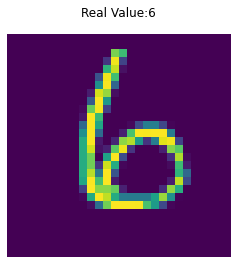

In [5]:
import matplotlib.pyplot as plt

idx = 100

# Visualizar alguna imagen.
plt.matshow(X_train[idx:(idx+1), :].reshape((28, 28)))
# Hemos mostrado el valor real en el título.
plt.title('Real Value:' + str(np.argmax(Y_train[idx])))
plt.axis(False)
plt.show()

In [6]:
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential

# Planteado la arquitectura de la red.
model = Sequential()

model.add(Input(shape=784))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(32,  activation='relu'))
# ...
model.add(Dense(10,  activation='softmax'))

# Compilamos a la red neuronal. (Función de coste; Optimizador.)
model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')

# Entrenar a la red neuronal.
model.fit(X_train, Y_train, validation_data=(X_test, Y_test) ,epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4350 - accuracy: 0.8715 - val_loss: 0.1907 - val_accuracy: 0.9448
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1687 - accuracy: 0.9485 - val_loss: 0.1807 - val_accuracy: 0.9446
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1103 - accuracy: 0.9665 - val_loss: 0.1273 - val_accuracy: 0.9660
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0809 - accuracy: 0.9734 - val_loss: 0.1144 - val_accuracy: 0.9672
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0585 - accuracy: 0.9815 - val_loss: 0.1382 - val_accuracy: 0.9612
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.1416 - val_accuracy: 0.9624
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0409 - accuracy: 0.9869 - val_loss: 0.1277 - val_accuracy: 0.9640
Epoch 

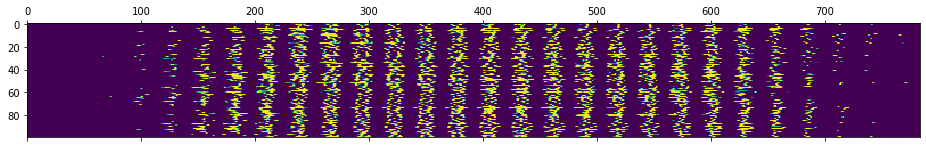

In [11]:
plt.matshow(X_test[200:300])

In [8]:
img[np.newaxis].shape

(1, 784)

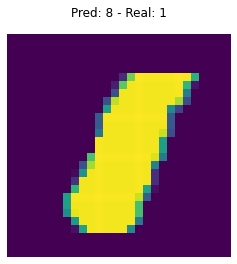

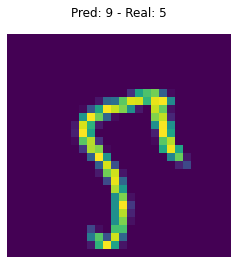

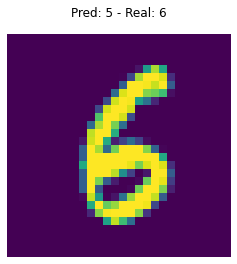

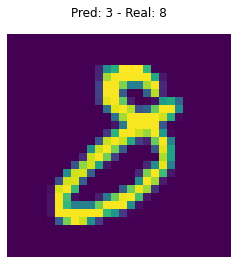

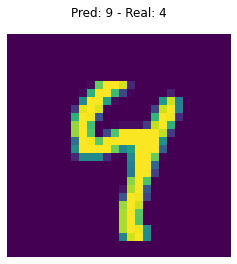

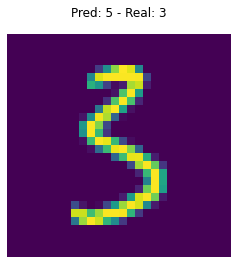

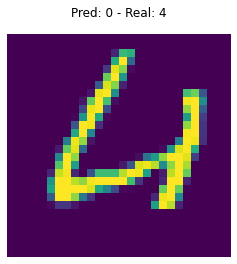

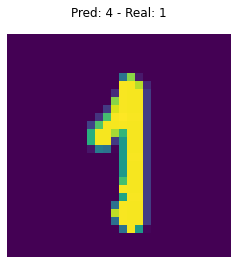

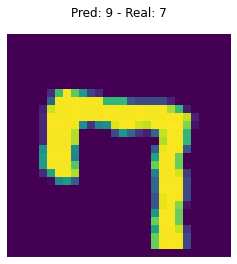

In [10]:
for i, img in enumerate(X_test[:200]):

  Yp = np.argmax(model.predict(img[np.newaxis]))
  Yr = np.argmax(Y_test[i])

  if Yp != Yr:

    plt.matshow(img.reshape((28, 28)))
    plt.title('Pred: ' + str(Yp) + ' - Real: ' + str(Yr))
    plt.axis(False)
    plt.show()